# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
version = mpl.__version__
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read SST, SSH and EKE trends

In [2]:
dataset   = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_trend.mat')
oisst_lon = dataset['oisst_lon'][:,:]
oisst_lat = dataset['oisst_lat'][:,:]
aviso_lon = dataset['aviso_lon'][:,:]
aviso_lat = dataset['aviso_lat'][:,:]
sst_trend = dataset['sst_trend'][:,:]*3650
ssh_trend = dataset['ssh_trend'][:,:]*3650
eke_trend = dataset['eke_trend'][:,:]*3650*100
sst_p     = dataset['sst_p'][:,:]
eke_p     = dataset['eke_p'][:,:]
ssh_p     = dataset['ssh_p'][:,:]
sst_p[np.where(sst_p > 0.05)] = np.nan
eke_p[np.where(eke_p > 0.05)] = np.nan
ssh_p[np.where(ssh_p > 0.05)] = np.nan
var_trend = np.array([sst_trend,ssh_trend,eke_trend])
var_p     = np.array([sst_p,ssh_p,eke_p])

# Plot the spatial distribution of SST, SSH and EKE trends

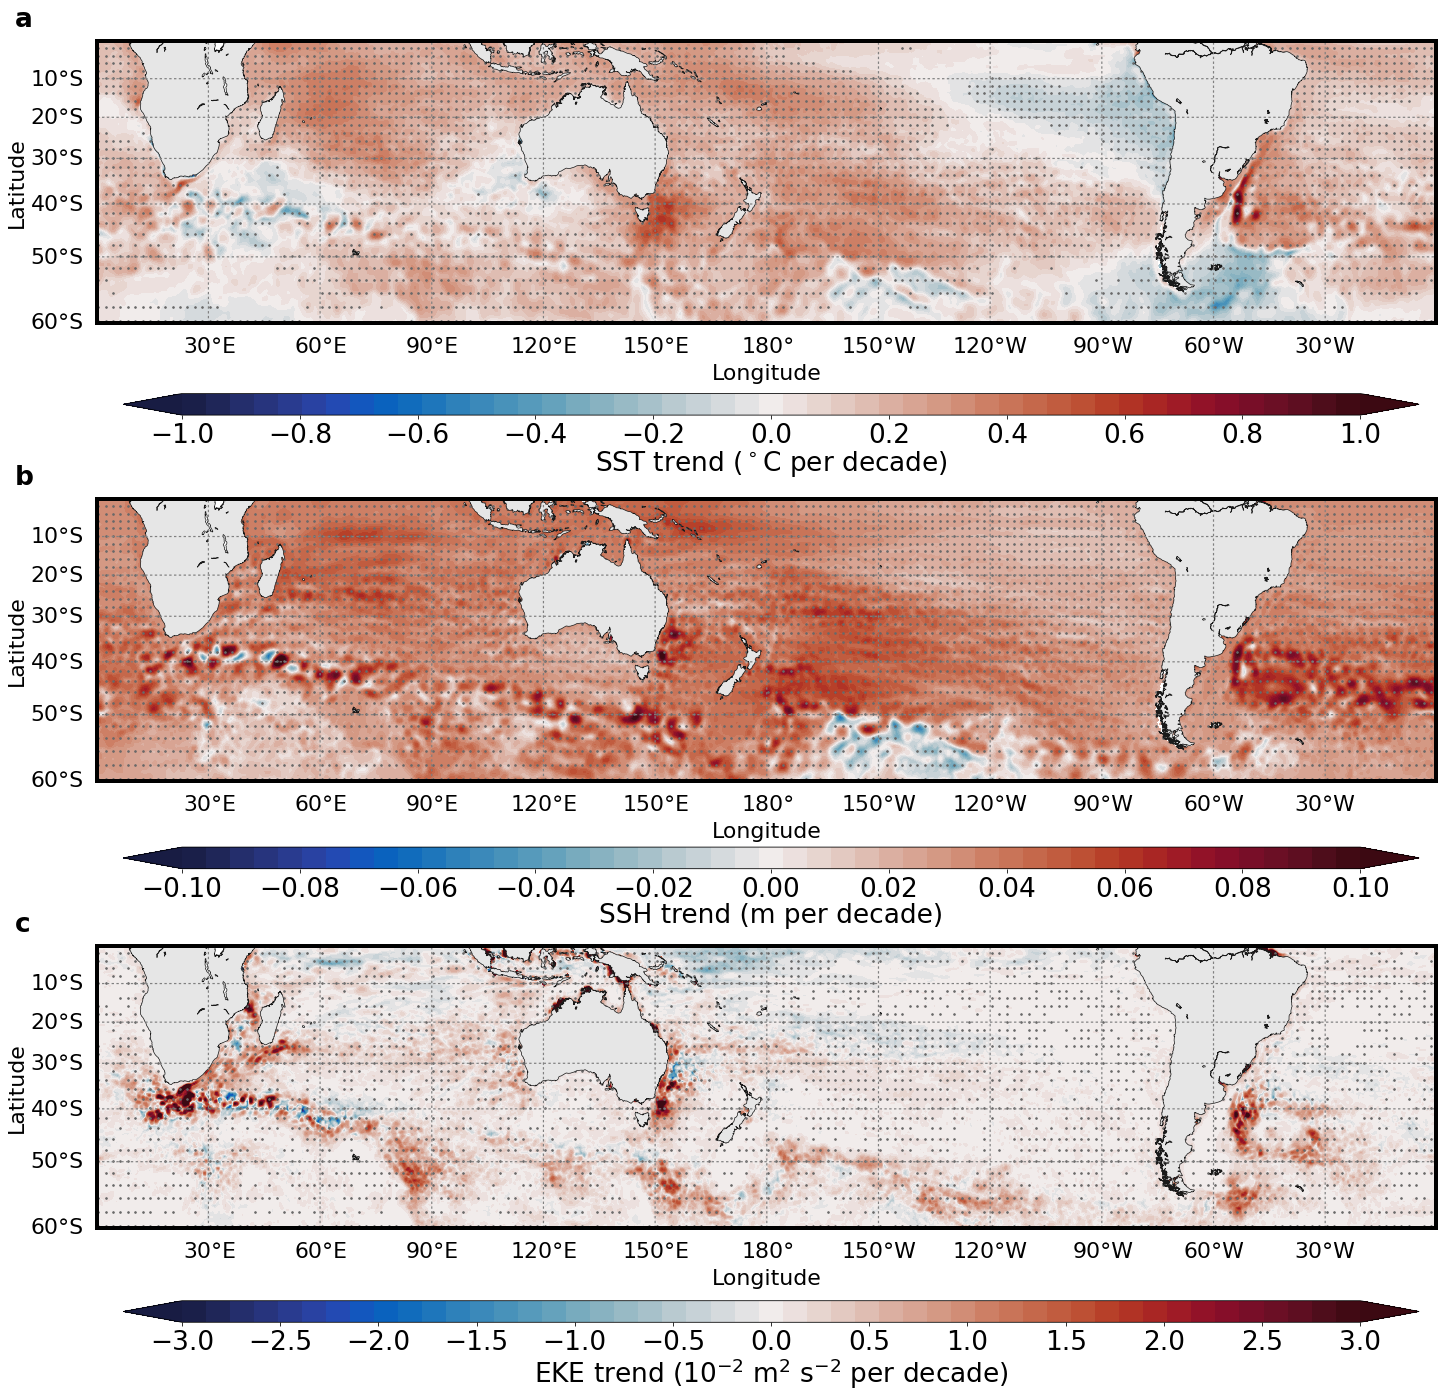

In [3]:
m             = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=np.nanmin(oisst_lat),urcrnrlat= np.nanmax(oisst_lat),
              llcrnrlon=np.nanmin(oisst_lon),urcrnrlon=np.nanmax(oisst_lon),resolution='l')
x, y          = m(oisst_lon, oisst_lat)
yy            = np.arange(1, y.shape[0], 8)
xx            = np.arange(1, x.shape[1], 8)
cx,cy         = m(-22, 4)
points        = np.meshgrid(yy, xx)
point_index   = tuple(points)
labels        = ['a','b','c']
levels1       = np.linspace(-1,1,50)
levels2       = np.linspace(-0.1,0.1,50)
levels3       = np.linspace(-3,3,50)
tick_marks1   = np.linspace(-1,1,11)
tick_marks2   = np.linspace(-0.1,0.1,11)
tick_marks3   = np.linspace(-3,3,13)
cmaps1        = cmaps.cmocean_balance
fig_ratio     = 0.9
fig           = plt.figure(figsize=(24, 30))
gs            = gridspec.GridSpec(4,1)
labelfont     = 22
padspacescale = 20
labelpadscale = 4
linefont      = 1.2
scale         = 1.0
m_scale       = 10
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for i in range(3):
    stipple_p=var_p[i]
    point_x=x[point_index]
    point_y=y[point_index]
    point_z=stipple_p[point_index]
    point_x=np.ravel(point_x)
    point_y=np.ravel(point_y)
    point_z=np.ravel(point_z)
    point_x=point_x[~np.isnan(point_z)]
    point_y=point_y[~np.isnan(point_z)]
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    m   = Basemap(projection='merc',lat_ts=1,llcrnrlat=np.nanmin(oisst_lat),urcrnrlat= np.nanmax(oisst_lat),llcrnrlon=np.nanmin(oisst_lon),urcrnrlon=np.nanmax(oisst_lon),resolution='l')    
    m.drawmeridians(np.arange(0,360, 30),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')
    m.drawparallels(np.arange(-60,-0, 10),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')   
    m.drawcoastlines(color='0.1',  linewidth=0.6*linefont)
    m.fillcontinents(color='0.9', lake_color='white')
    if i==0:
        CB1=m.contourf(x, y, var_trend[i],cmap=cmaps1,levels=levels1,origin='lower',extend='both')     
    elif i==1:
        b=b-0.015
        CB2=m.contourf(x, y, var_trend[i],cmap=cmaps1,levels=levels2,origin='lower',extend='both')
    elif i==2:
        b=b-0.025
        CB3=m.contourf(x, y, var_trend[i],cmap=cmaps1,levels=levels3,origin='lower',extend='both')
    CS1=m.scatter(point_x,point_y,s=m_scale,c='dimgray',marker='.') 
    plt.xlabel('Longitude',fontsize=labelfont,labelpad=2.0*padspacescale,family='sans-serif')
    plt.ylabel('Latitude',fontsize=labelfont,labelpad=3.5*padspacescale,family='sans-serif')
    ax.axes.xaxis.set_tick_params(pad=0)
    ax.axes.yaxis.set_tick_params(pad=0)
    ax.set_position([l, b, scale*w, scale*h])   
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=1.2*labelfont, weight='bold',family='sans-serif')
cbaxes1     = fig.add_axes([0.14, 0.69, 0.75, 0.01])
cb1 = plt.colorbar(CB1,orientation='horizontal',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=1.2*labelfont)
cb1.set_label(r'SST trend ($^\circ$C per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes2     = fig.add_axes([0.14, 0.48, 0.75, 0.01])
cb2 = plt.colorbar(CB2,orientation='horizontal',cax = cbaxes2)
cb2.set_ticks(tick_marks2)
cb2.ax.tick_params(labelsize=1.2*labelfont)
cb2.set_label(r'SSH trend (m per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes3     = fig.add_axes([0.14, 0.27, 0.75, 0.01])
cb3 = plt.colorbar(CB3,orientation='horizontal',cax = cbaxes3)
cb3.set_ticks(tick_marks3)
cb3.ax.tick_params(labelsize=1.2*labelfont)
cb3.set_label(r'EKE trend (10$^{-2}$ m$^{2}$ s$^{-2}$ per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
fig.savefig(directory+'/BRAN_WBC/SO/Figure1_sst_ssh_eke_trends.pdf',dpi=300,bbox_inches = 'tight')